<a href="https://colab.research.google.com/github/salimunlu47/Transportation-Models/blob/main/Handy_Taha_MG_Transportation_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade quantecon

In [ ]:
import numpy as np
from scipy.optimize import linprog
from quantecon.optimize import linprog_simplex

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


**Example 5.1-1**

MG Auto has three plants in *Los Angeles*, *Detroit*, and *New Orleans* and two major distribution centers in *Denver* and *Miami*. 

The quarterly capacities of the three plants are 1000, 1500, and 1200 cars, and the demands at the two distribution centers for the same period are 2300 and 1400 cars. 

The mileage chart between the plants and the distribution centers is given in Table 5.1.

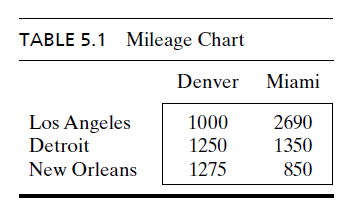

In [ ]:
# Define parameters
m = 3
n = 2

p = np.array([1000, 1500, 1200])
q = np.array([2300, 1400])

C = np.array([[80,  215],
              [100, 108],
              [102, 68]])

# Vectorize matrix C
C_vec = C.reshape((m*n, 1), order='F')

# Construct matrix A by Kronecker product
A1 = np.kron(np.ones((1, n)), np.identity(m))
A2 = np.kron(np.identity(n), np.ones((1, m)))
A = np.vstack([A1, A2])

# Construct vector b
b = np.hstack([p, q])

# Solve the primal problem
res = linprog(C_vec, A_eq=A, b_eq=b, method='Revised simplex')

# Print results
print("message:", res.message)
print("nit:", res.nit)
print("fun:", res.fun)
print("z:", res.x)
print("X:", res.x.reshape((m,n), order='F'))

message: Optimization terminated successfully.
nit: 4
fun: 313200.0
z: [1000. 1300.    0.    0.  200. 1200.]
X: [[1000.    0.]
 [1300.  200.]
 [   0. 1200.]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
